Matthias Rathbun  
10/06/22

# Walmart Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
walmart = pd.read_csv("WalmartSalesData.csv")

In [3]:
walmart.head(6)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False


In [4]:
walmart.tail(6)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8184,45,2013-06-21,70.13,3.626,4989.34,385.31,178.56,2463.42,3117.94,NaN,NaN,False
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [5]:
walmart.shape

(8190, 12)

In [6]:
walmart.isnull().any(axis=1).sum()

6121

In [7]:
walmart.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

<AxesSubplot:>

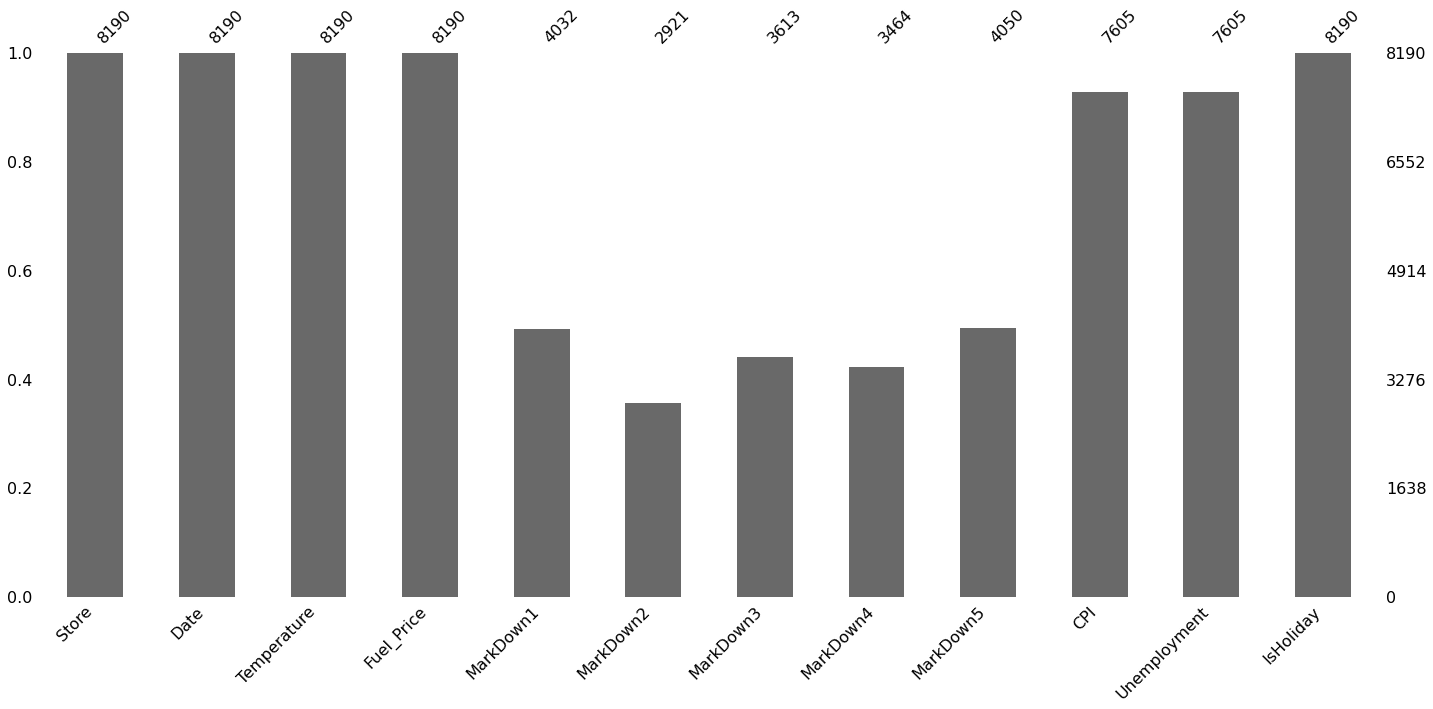

In [8]:
msno.bar(walmart)

<AxesSubplot:>

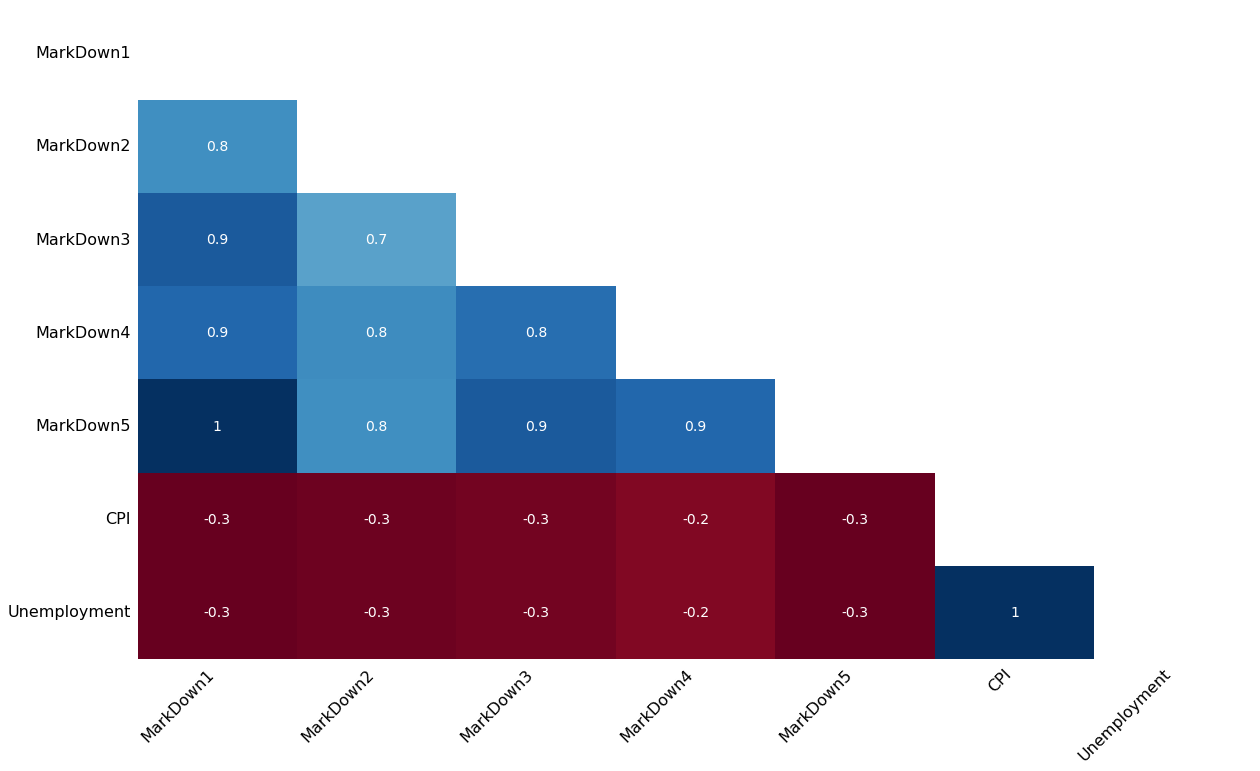

In [9]:
msno.heatmap(walmart)

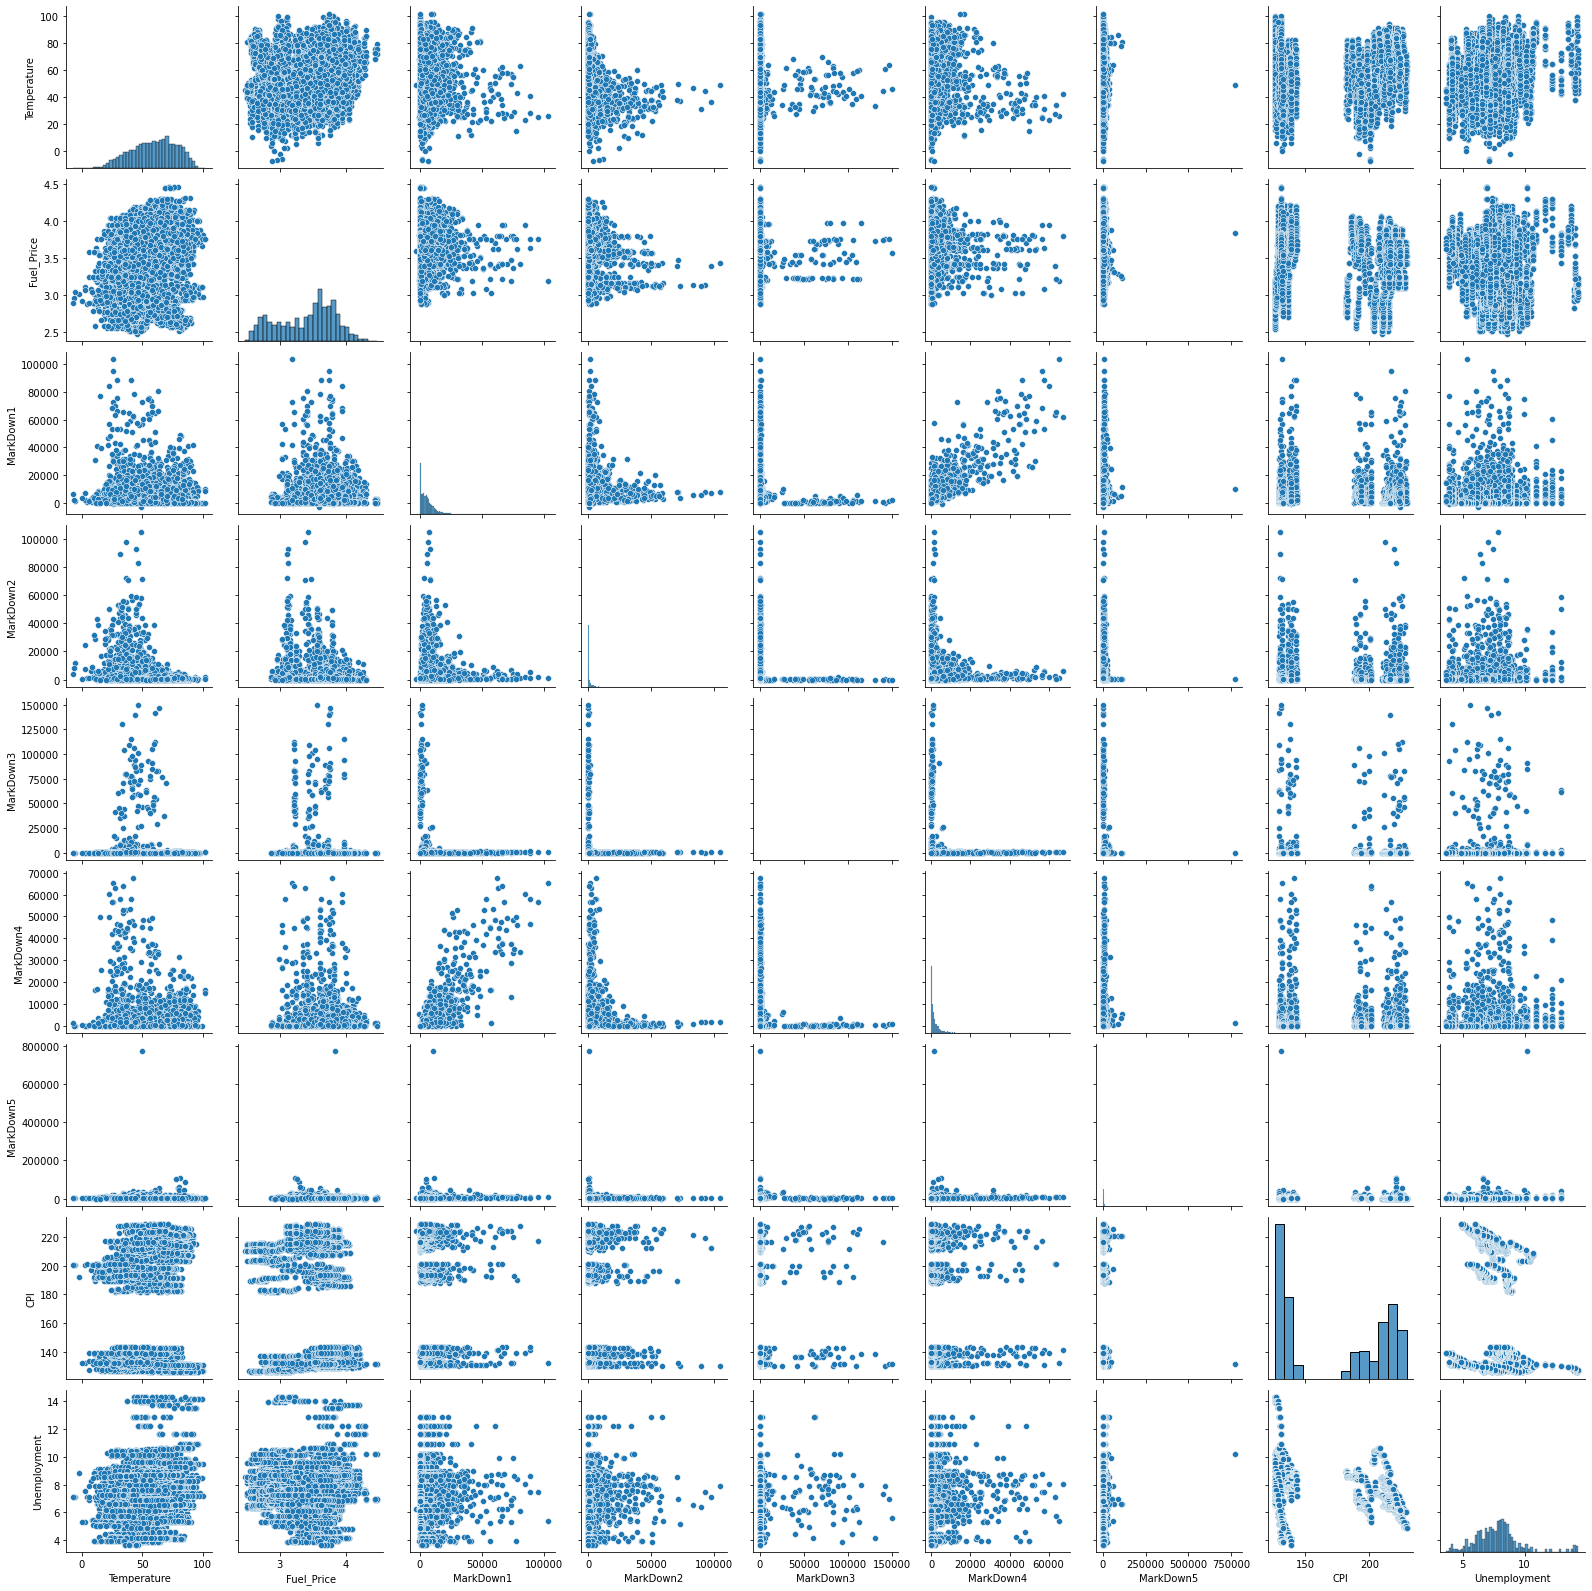

In [10]:
sns.pairplot(walmart.iloc[:, 1:11])

<AxesSubplot:>

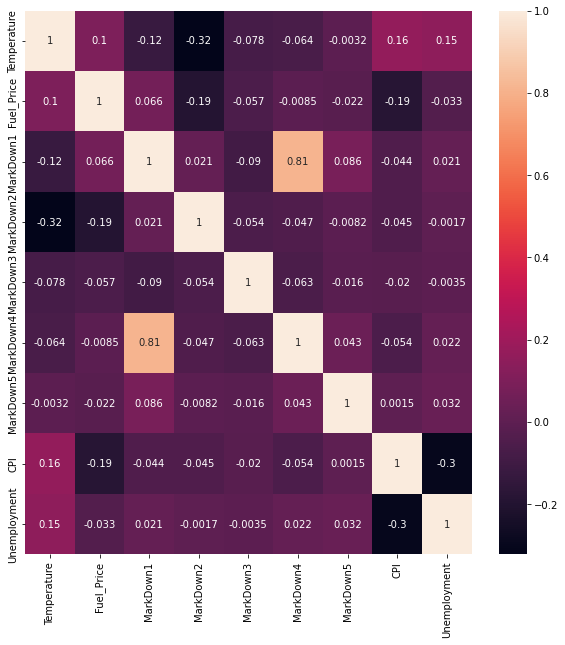

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(walmart.iloc[:, 1:11].corr(),annot = True)

In [12]:
walmart_knn = walmart.filter(['Store','Temperature','Fuel_Price','MarkDown1',"MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","IsHoliday"], axis=1).copy()


scaler = MinMaxScaler(feature_range=(0, 1))
walmart_knn = pd.DataFrame(scaler.fit_transform(walmart_knn), columns = walmart_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
walmart_knn_imputed = pd.DataFrame(scaler.inverse_transform(knn_imputer.fit_transform(walmart_knn)), columns=walmart_knn.columns)
walmart_knn_imputed["Date"] = walmart["Date"]

In [13]:
walmart_knn_imputed

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Date
0,1.0,42.31,2.572,5487.830,36.532,789.202,1999.654,10602.652,211.096358,8.1060,0.0,2010-02-05
1,1.0,38.51,2.548,8277.274,49308.442,203.818,554.166,2645.896,211.242170,8.1060,1.0,2010-02-12
2,1.0,39.93,2.514,5239.752,86.308,532.316,2408.448,6755.190,211.289143,8.1060,0.0,2010-02-19
3,1.0,46.63,2.561,4195.576,41.932,797.390,1212.702,9625.110,211.319643,8.1060,0.0,2010-02-26
4,1.0,46.50,2.625,4195.576,41.932,797.390,1212.702,9625.110,211.350143,8.1060,0.0,2010-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45.0,76.05,3.639,4842.290,975.030,3.000,2449.970,3169.690,153.941456,7.3862,0.0,2013-06-28
8186,45.0,77.50,3.614,9090.480,2268.580,582.740,5797.470,1514.930,129.224090,6.5600,0.0,2013-07-05
8187,45.0,79.37,3.614,3789.940,1827.310,85.720,744.840,2150.360,142.555580,6.2930,0.0,2013-07-12
8188,45.0,82.84,3.737,2961.490,1047.070,204.190,363.000,1059.460,179.302707,8.4154,0.0,2013-07-19


In [14]:
walmart_knn_imputed.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Date            0
dtype: int64

# Credit Card Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [16]:
card = pd.read_csv("CreditCardData.csv", index_col = "ID")

In [17]:
card.isnull().sum()

Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [18]:
card.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
ID,,,,,,,,,,,,,,,,,,,
5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [19]:
card_train, card_test = train_test_split(card, test_size=0.3, random_state=101)

In [20]:
X_1 = card_train[["Own_property","Phone","Email","Num_children"]]
y_1 = card_train["Unemployed"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_1, y_1)

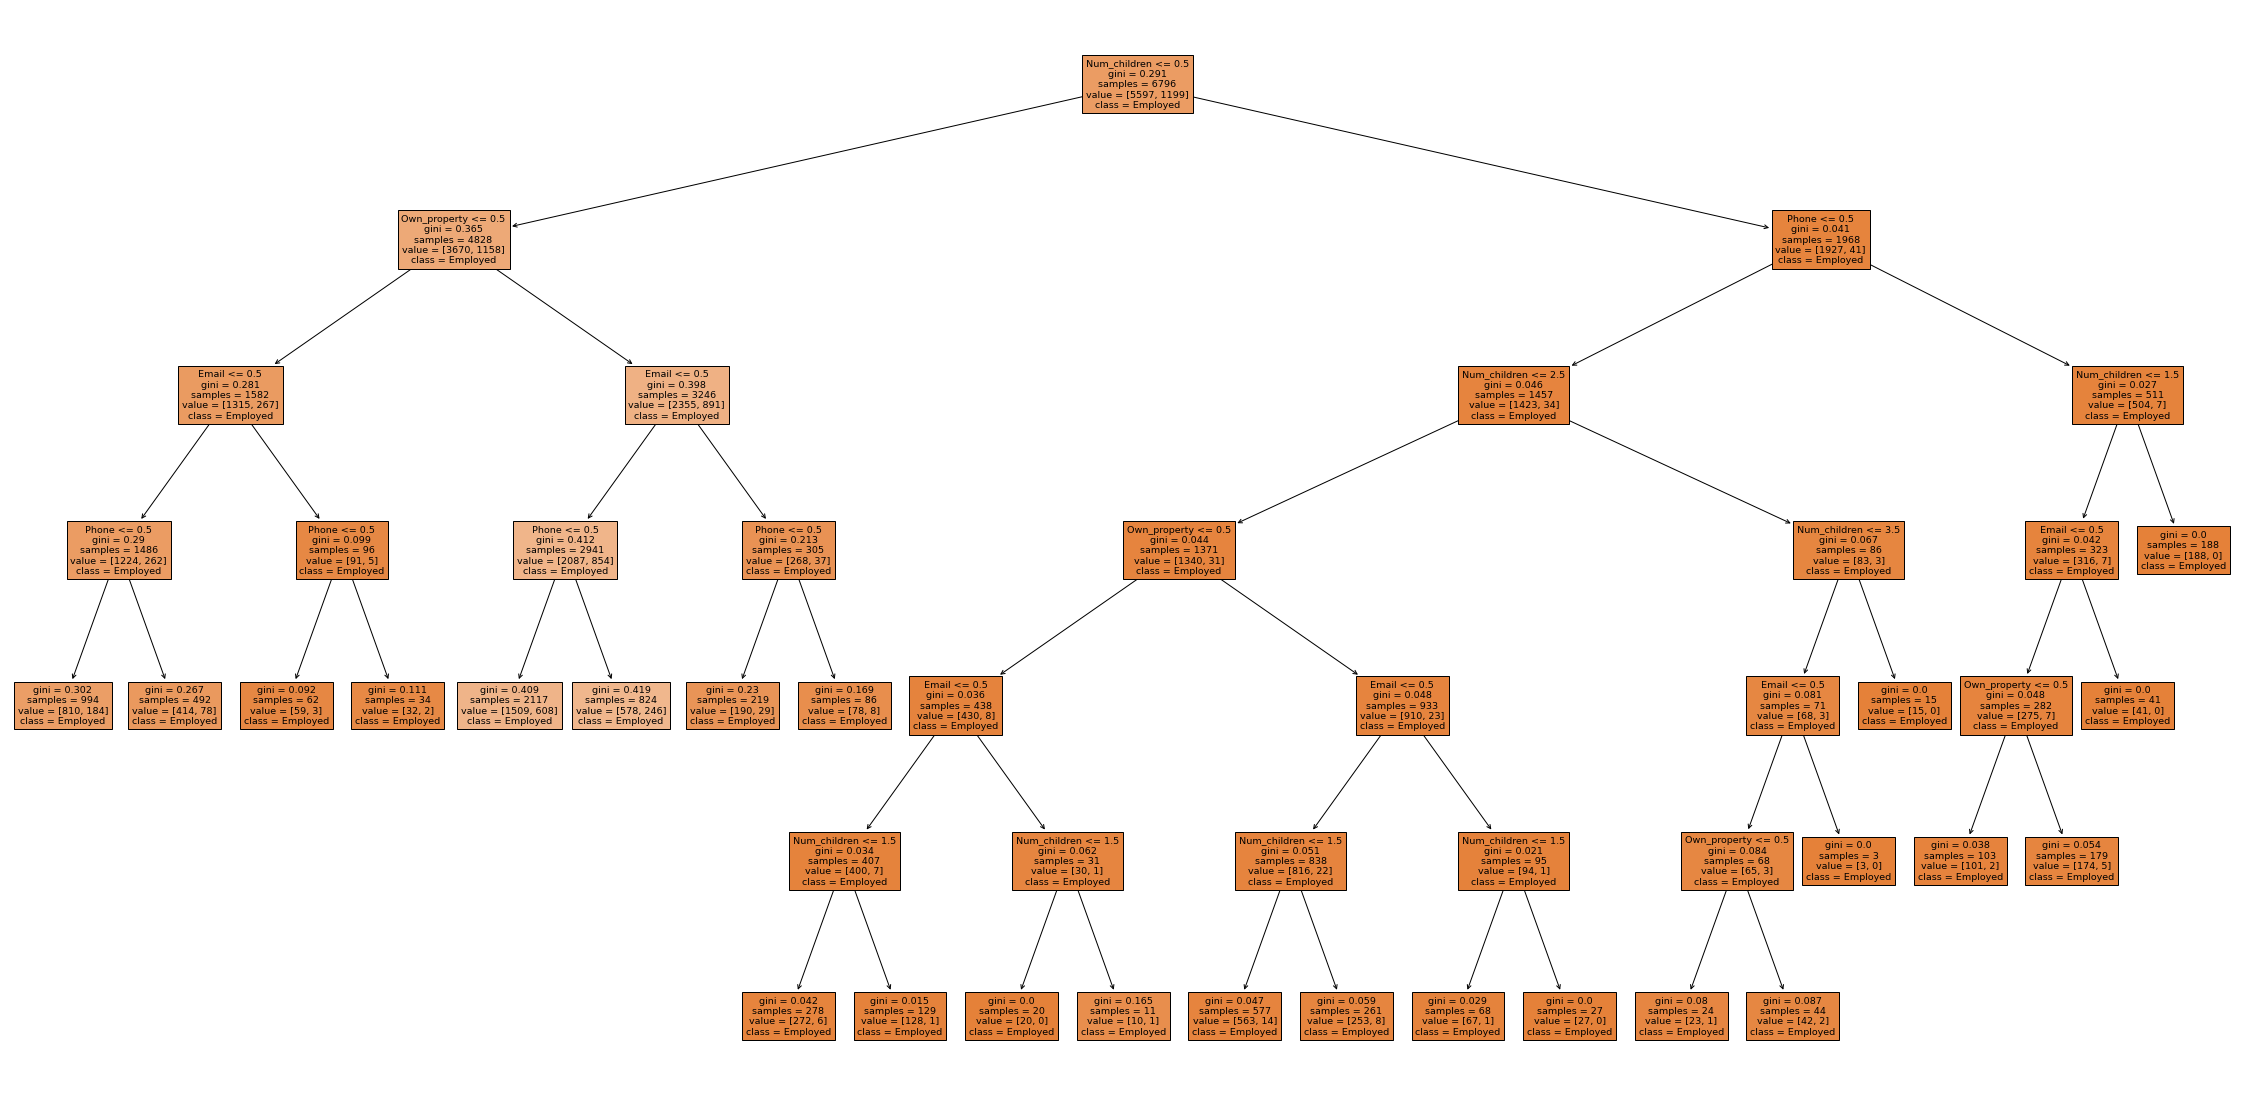

In [21]:
plt.figure(figsize = (40,20))
fn=X_1.columns
cn = ["Employed", "Unemployed"]
tree.plot_tree(clf, feature_names = fn, 
               class_names=cn,
               filled = True);

In [22]:
test_1 = card_test[["Own_property","Phone","Email","Num_children"]]
truth_1 = card_test["Unemployed"]
pred_1 = clf.predict(test_1)
accuracy_score(truth_1, pred_1)

0.8293855132166151

In [23]:
X_2 = card_train[["Total_income","Num_children","Unemployed","Own_property"]]
y_2 = card_train["Age"]
reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_2, y_2)

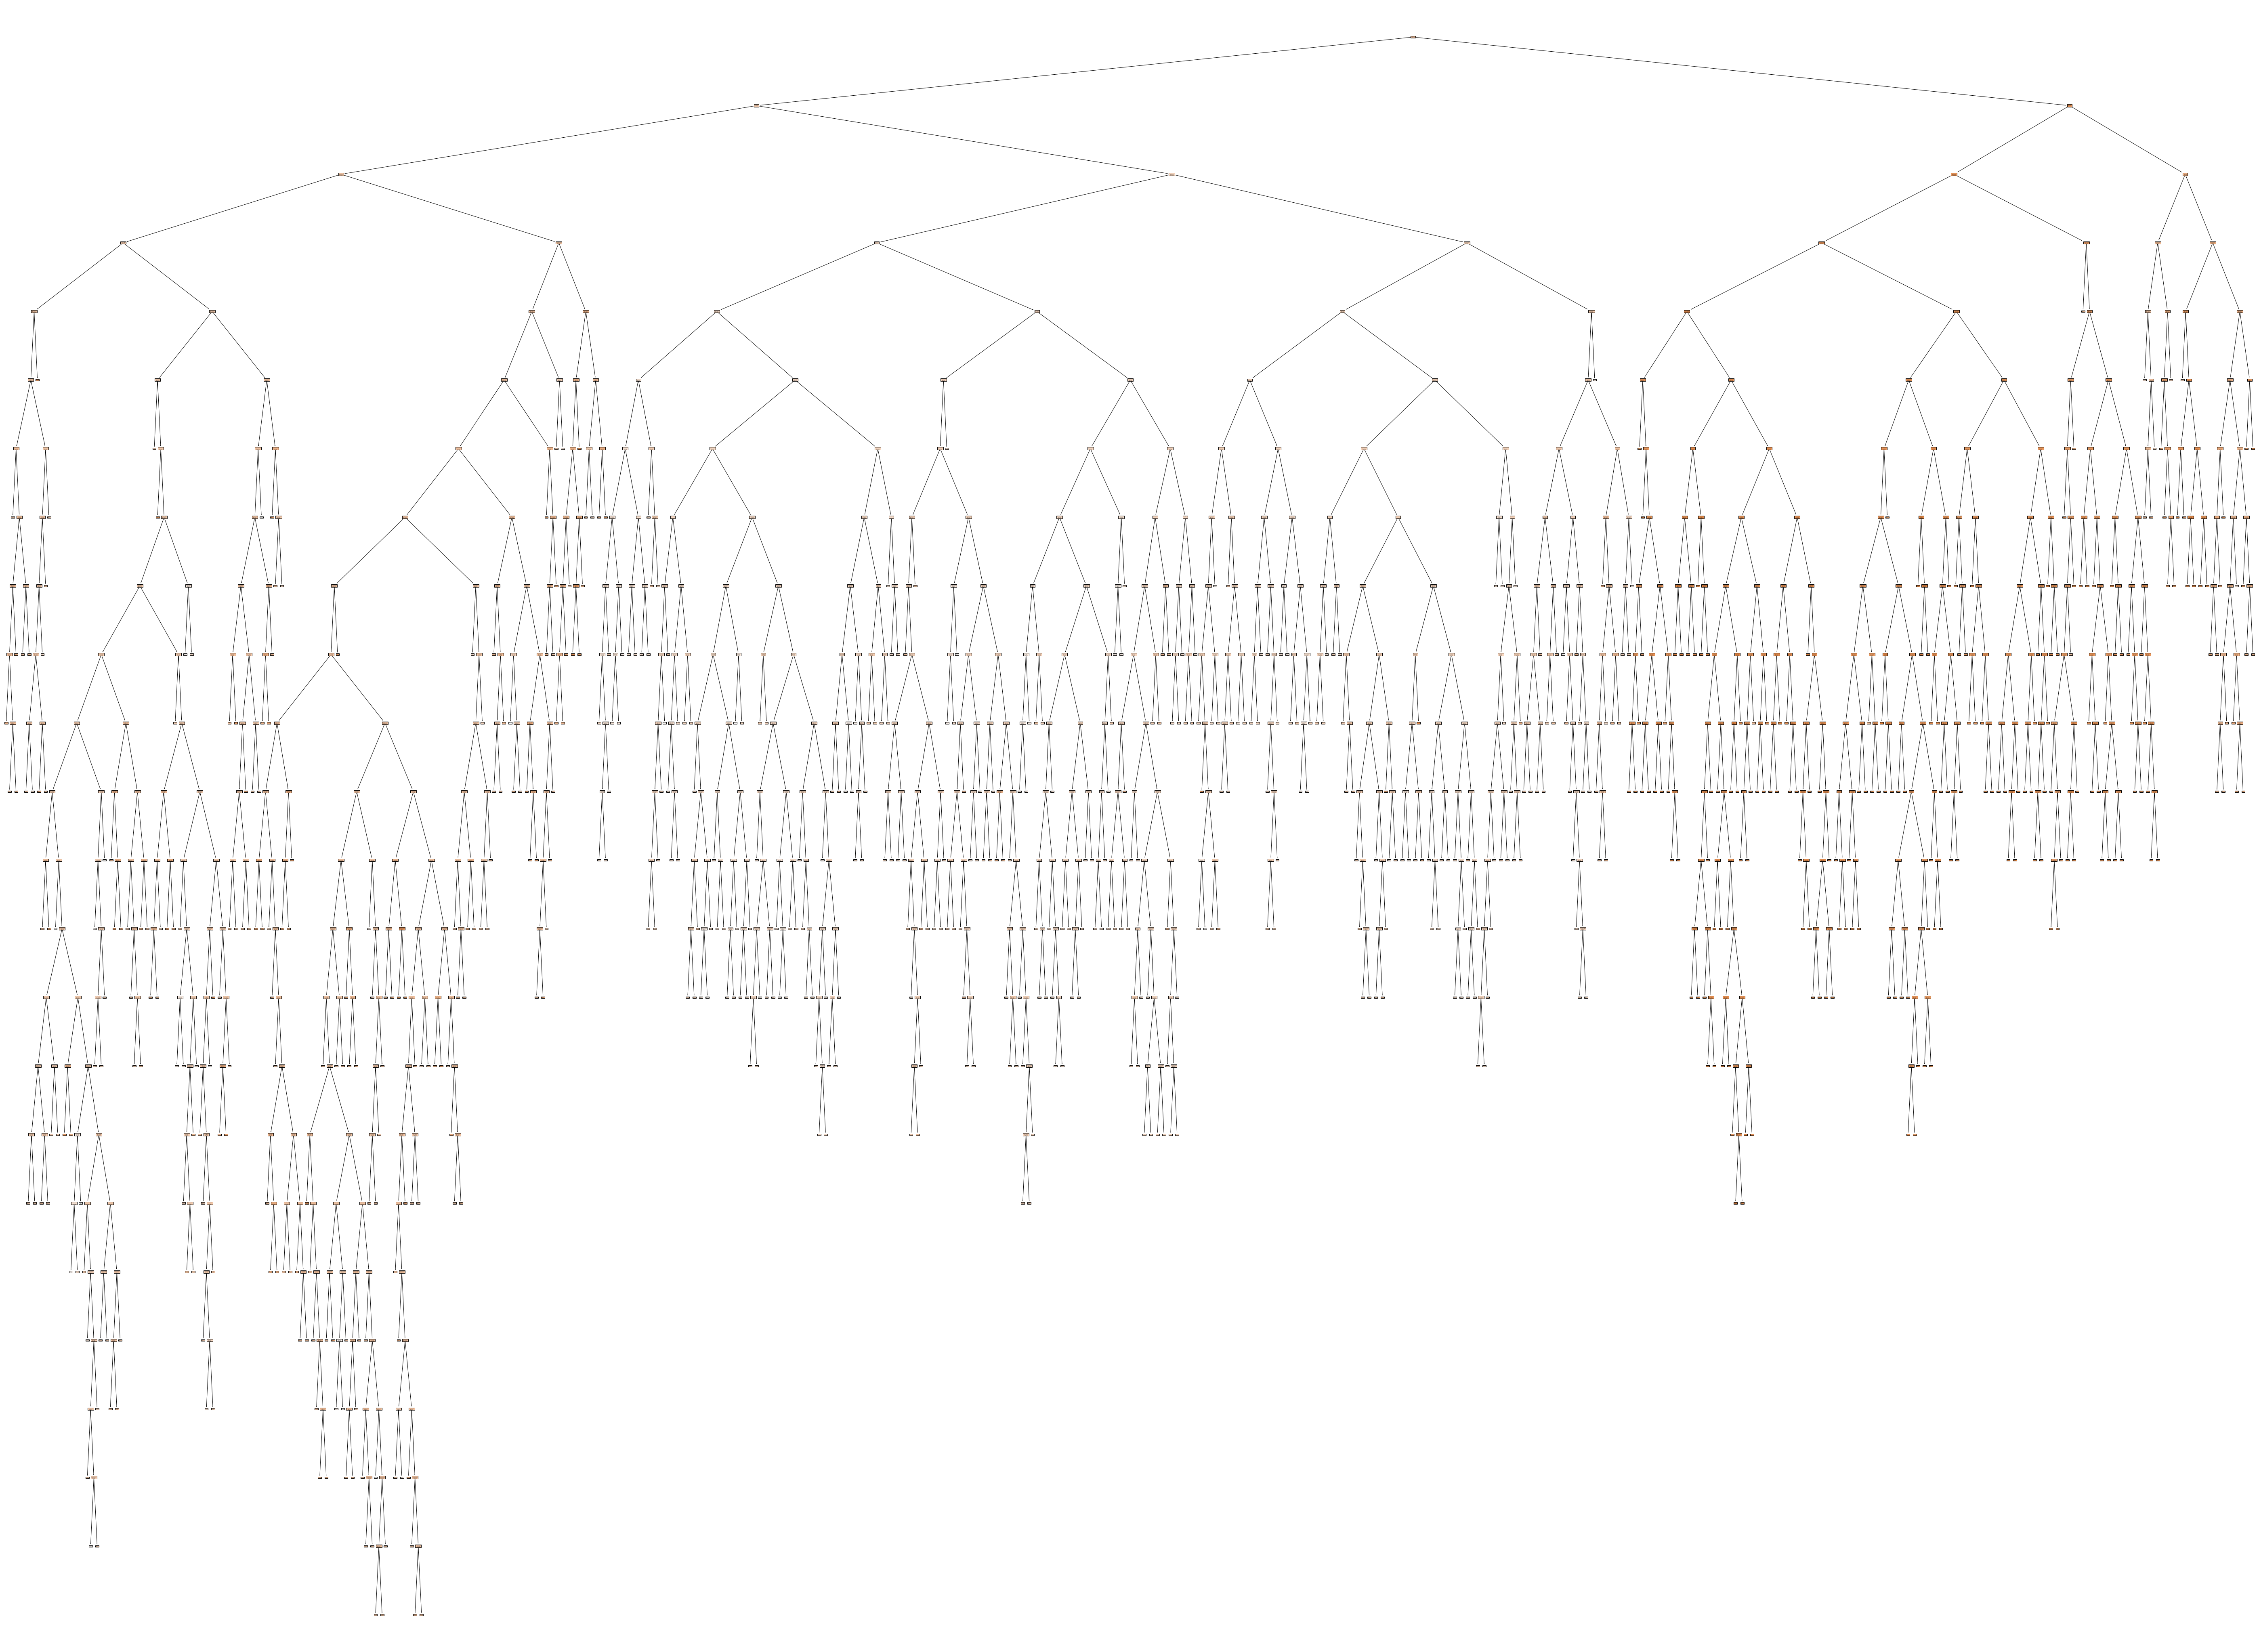

In [24]:
plt.figure(figsize = (100,75))
fn=X_2.columns

tree.plot_tree(reg, feature_names = fn,
               filled = True);

In [25]:
test_2 = card_train[["Total_income","Num_children","Unemployed","Own_property"]]
truth_2 = card_train["Age"]
pred_2 = reg.predict(test_2)
mean_squared_error(truth_1, pred_1, squared = False)

0.4130550650741192

In [26]:
X_train = card_train.iloc[:,:13]
y_train = card_train.iloc[:,18:]
X_test = card_test.iloc[:,:13]
y_test = card_test.iloc[:,18:]

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [28]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7693099897013388

In [29]:
selector = RFECV(tree.DecisionTreeClassifier(), step=1, min_features_to_select=4, cv=5)
selector = selector.fit(X_train, y_train)

In [30]:
selector.ranking_

array([ 3,  4,  8,  7,  6,  9, 10,  5,  2,  1,  1,  1,  1])

In [31]:
y_pred = selector.predict(X_test)
accuracy_score(y_test, y_pred)

0.7641606591143152

In [32]:
selector = RFECV(tree.DecisionTreeClassifier(), step=1, min_features_to_select=3, cv=5)
selector = selector.fit(X_train, y_train)

In [33]:
selector.ranking_

array([2, 1, 4, 3, 1, 5, 6, 1, 1, 1, 1, 1, 1])

In [34]:
y_pred = selector.predict(X_test)
accuracy_score(y_test, y_pred)

0.7693099897013388

In [35]:
selector = RFECV(tree.DecisionTreeClassifier(), step=1, min_features_to_select=2, cv=5)
selector = selector.fit(X_train, y_train)

In [36]:
selector.ranking_

array([ 7,  5, 11, 10,  6,  9, 12,  8,  4,  2,  3,  1,  1])

In [37]:
y_pred = selector.predict(X_test)
accuracy_score(y_test, y_pred)

0.7789220734637831

In [38]:
selector = RFECV(tree.DecisionTreeClassifier(), step=1, min_features_to_select=1, cv=5)
selector = selector.fit(X_train, y_train)

In [39]:
selector.ranking_

array([ 8,  7, 11, 10,  6, 12, 13,  9,  5,  3,  4,  1,  2])

In [40]:
y_pred = selector.predict(X_test)
accuracy_score(y_test, y_pred)

0.7964297974596636

Account Length, Total Income, Age, and Years Employed had the highest feature importance with regards to predicting the risk of a client. Decsion Tree with highest importance on age leads to highest validation accuracy.

**NOTE TO GRADER**: I have no idea how to interpret **"Using the accuracy on the test dataset which 4 independent variables (features) do you choose reporting the accuracy for the alternatives
list at least 3)?"** I am assuming recursive feature selection is being asked for, but if that is not the case, please comment on webcourses to clarify its meaning. If this is not what the professor asked for, I would like to know so I can recode this small section. Thanks!


In [41]:
reg = LinearRegression()
X_train = card_train[["Account_length","Age"]]
y_train = card_train["Total_income"]
X_test = card_test[["Account_length","Age"]]
y_test = card_test["Total_income"]
reg.fit(X_train, y_train)

LinearRegression()

In [42]:
X_train.iloc[:,0:].min()

Account_length     0.000000
Age               21.095573
dtype: float64

In [43]:
feature_x = np.linspace(X_test.iloc[:, 0].min(),X_test.iloc[:, 0].max(),100)
feature_y = np.linspace(X_test.iloc[:, 1].min(),X_test.iloc[:, 1].max(),100)

In [44]:
dim1, dim2 = np.meshgrid(feature_x, feature_y)

In [45]:
mesh_df = np.array([X_test.mean(axis=0) for i in range(dim1.size)])
mesh_df[:,0] = dim1.ravel()
mesh_df[:,1] = dim2.ravel()

In [46]:
Z = reg.predict(mesh_df).reshape(dim1.shape)  

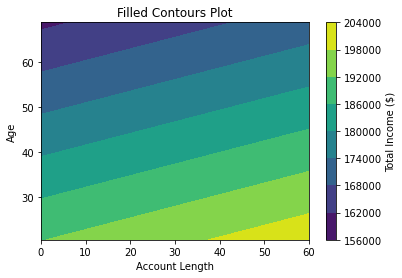

In [47]:
fig, ax = plt.subplots()

cp = ax.contourf(dim1, dim2, Z)  
ax.set_title('Filled Contours Plot')
ax.set_xlabel('Account Length')
ax.set_ylabel('Age')
fig.colorbar(cp).set_label('Total Income ($)')
plt.show()